# **Multi-layer Perceptron (MLP)**
> Multi-layer Perceptron (MLP) is a supervised learning algorithm that learns a function $f(\cdot): R^m \rightarrow R^o$ by training on a dataset, where $m$ is the number of dimensions for input and $o$ is the number of dimensions for output. 
- Given a set of features $X = {x_1, x_2, ..., x_m}$ and a target $y$, it can learn a non-linear function approximator for either classification or regression. 
- It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers. 
- The following figure shows 4 hidden layers MLP: 

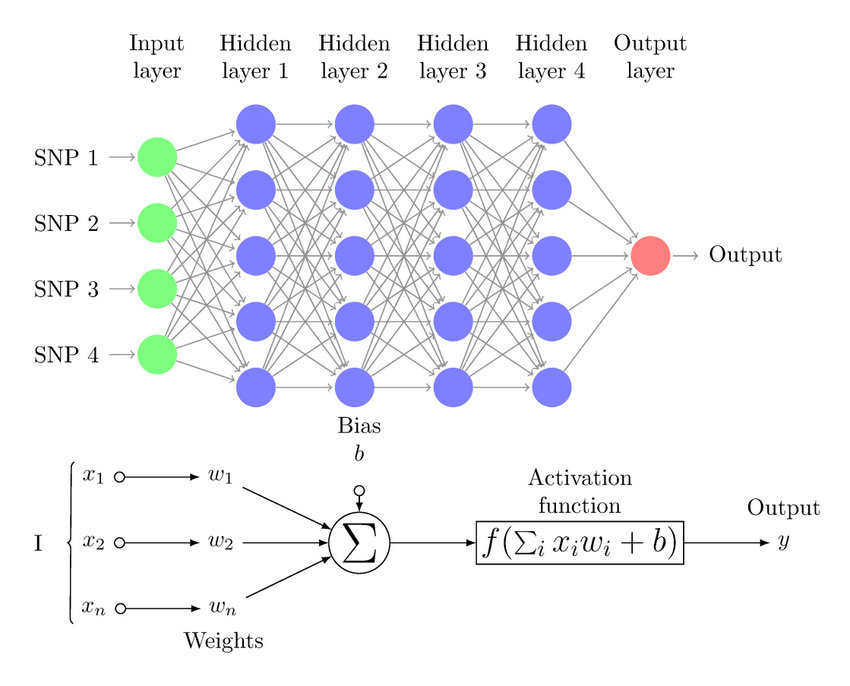

**What is the validation set or validation loss?**
- The `validation set` is a set of examples used to tune the hyperparameters of a classifier.
- The `validation loss` is the error rate of the classifier on the validation set.

#### **1. Importing Libraries**

In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns

#### **2. Loading Data**

In [2]:
# Load tips dataset
tips = sns.load_dataset('tips')

#### **3. Data Preprocessing**

In [3]:
# Preprocessing
#3.1 Converting categorical variables to dummy variables
tips = pd.get_dummies(tips, drop_first=True)

#### **4. Selecting the Target (y) and Features (X)**

In [4]:
# Selecting features and target (predicting 'tip' based on other features)
X = tips.drop('tip', axis=1)
y = tips['tip']

#### **5. Splitting the Data into Training and Testing Sets**

In [5]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

#### **6. Standardizing the Data**

In [6]:
# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### **7. Building the Model**

In [7]:
# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', 
                          input_shape=(X_train.shape[1],)), # Input layer
    
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    
    tf.keras.layers.Dense(1)  # Output layer for regression
])

#### **8. Compiling the Model**

In [8]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

#### **9. Training the Model**

In [9]:
# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
7/7 [==============================] - 3s 11ms/step - loss: 11.2407 - mae: 3.0482
Epoch 2/100
7/7 [==============================] - 0s 21ms/step - loss: 9.8721 - mae: 2.8125
Epoch 3/100
7/7 [==============================] - 0s 25ms/step - loss: 8.6070 - mae: 2.5729
Epoch 4/100
7/7 [==============================] - 0s 26ms/step - loss: 7.3515 - mae: 2.3101
Epoch 5/100
7/7 [==============================] - 0s 20ms/step - loss: 6.0901 - mae: 2.0232
Epoch 6/100
7/7 [==============================] - 0s 32ms/step - loss: 4.8244 - mae: 1.7157
Epoch 7/100
7/7 [==============================] - 0s 32ms/step - loss: 3.7390 - mae: 1.4427
Epoch 8/100
7/7 [==============================] - 0s 28ms/step - loss: 2.9259 - mae: 1.2647
Epoch 9/100
7/7 [==============================] - 0s 27ms/step - loss: 2.3120 - mae: 1.1355
Epoch 10/100
7/7 [==============================] - 0s 21ms/step - loss: 1.9418 - mae: 1.0742
Epoch 11/100
7/7 [==============================] - 0s 24ms/step - l

#### **10. Evaluating the Model**

In [10]:
# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
print('Mean Squared Error: ', loss[0]) # loss[0] means the first element of the list

Mean Squared Error:  1.1153757572174072


## **Plotting the Loss and Accuracy of the Model**

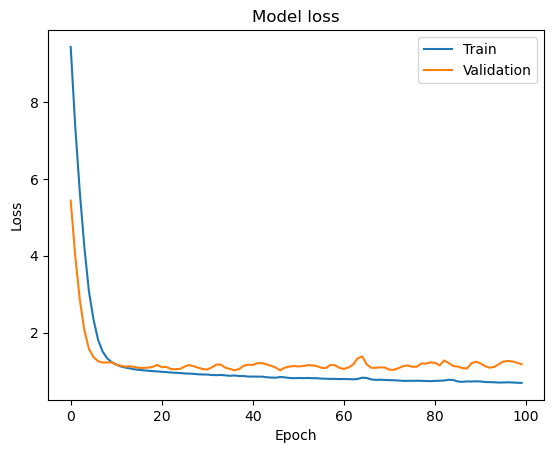

In [14]:
# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# train the model and plot the training and testing loss and accuracy at each epoc
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_test, y_test))

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

---

## **Early Stopping of Epochs**
> Early stopping of epochs means to stop the training process of the model when the model starts to overfit the training data. 
- Overfitting occurs when the model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data.
- Early stopping is a method that allows you to specify an arbitrary large number of training epochs and stop training once the model performance stops improving on a hold out validation dataset.

#### **Callback Function:**
- It limits the number of iterations on the basis of not enough improvement in accuracy.
- A callback is a set of functions to be applied at given stages of the training procedure.
- You can use callbacks to get a view on internal states and statistics of the model during training.
- You can pass a list of callbacks (as the keyword argument callbacks) to the .fit() method of the Sequential or Model classes.
- The relevant methods of the callbacks will then be called at each stage of the training.

Epoch 1/100
7/7 [==============================] - 2s 103ms/step - loss: 11.8261 - val_loss: 7.2614
Epoch 2/100
7/7 [==============================] - 0s 17ms/step - loss: 9.3562 - val_loss: 5.5093
Epoch 3/100
7/7 [==============================] - 0s 24ms/step - loss: 7.3610 - val_loss: 4.1331
Epoch 4/100
7/7 [==============================] - 0s 26ms/step - loss: 5.7853 - val_loss: 3.0487
Epoch 5/100
7/7 [==============================] - 0s 75ms/step - loss: 4.4371 - val_loss: 2.2854
Epoch 6/100
7/7 [==============================] - 0s 24ms/step - loss: 3.3767 - val_loss: 1.8260
Epoch 7/100
7/7 [==============================] - 0s 29ms/step - loss: 2.6804 - val_loss: 1.6118
Epoch 8/100
7/7 [==============================] - 0s 29ms/step - loss: 2.2276 - val_loss: 1.5686
Epoch 9/100
7/7 [==============================] - 0s 29ms/step - loss: 1.9259 - val_loss: 1.5436
Epoch 10/100
7/7 [==============================] - 0s 28ms/step - loss: 1.7842 - val_loss: 1.5153
Epoch 11/100
7/7 

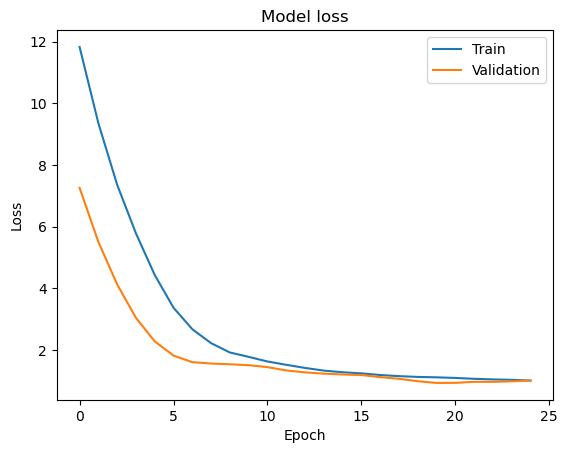

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define the callback function
early_stopping = EarlyStopping(patience=5) # patience is the number of epochs to wait before early stopping

# Train the model with the callback function
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

This piece of code is training the model with an early stopping callback. Here's a breakdown of what's happening:

1. `early_stopping = EarlyStopping(patience=5)`: This line is creating an early stopping callback. Early stopping is a form of regularization used to avoid overfitting when training a learner with an iterative method, such as gradient descent. This callback will stop the training when a monitored quantity has stopped improving. The `patience` parameter is the number of epochs with no improvement after which training will be stopped. In this case, training will stop if there's no improvement for 5 epochs.

2. `history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test, y_test), callbacks=[early_stopping])`: This line is training the model with the early stopping callback. The `validation_data` parameter is set to `(X_test, y_test)`, which means that the model's performance will be evaluated on the test data after each epoch. The `callbacks` parameter is a list of callbacks to apply during training. In this case, it includes the early stopping callback.

**Observations:**
The output shows the progress of the training process. For each epoch, it shows the loss on the training data and the validation loss, which is the loss on the test data. The training process stops when the validation loss has not improved for 5 epochs, which is indicated by the absence of output after the 25th epoch.

> In summary, this code is training the model with an early stopping callback, which stops the training process when the model's performance on the test data has not improved for 5 epochs. The output shows that the model's performance on the test data is improving over time, but the training process stops early because the performance has not improved for 5 epochs.